# Simple Approach to Multi-Label Classification

## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = "C:/Users/Sachinksingh/Documents/SachinUV/Inspiring/ML_GUILD/generic-electronics-data.csv"

In [4]:
df = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
df.shape

(7249, 3)

In [5]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
printmd("**Sample data:**")
df.head()

Number of rows in data = 7249
Number of columns in data = 3




**Sample data:**

,name,categories,primaryCategories
0,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,"Audio & Video Accessories,TV Mounts,TV Accesso...",Electronics
1,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics
2,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics
3,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics


In [6]:

df['primaryCategories'] = df['primaryCategories'].astype('category')
df['primaryCategories_encoded'] = df['primaryCategories'].cat.codes

In [7]:
df['categories'] = df['categories'].astype('category')
df['categories_encoded'] = df['categories'].cat.codes

In [8]:
df.head()

,name,categories,primaryCategories,primaryCategories_encoded,categories_encoded
0,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,"Audio & Video Accessories,TV Mounts,TV Accesso...",Electronics,3,47
1,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,3,704
2,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,3,704
3,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,3,704
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,3,704


In [16]:
data_raw=df[['name', 'categories_encoded','primaryCategories_encoded']].copy()

In [17]:
data_raw.head()

,name,categories_encoded,primaryCategories_encoded
0,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,47,3
1,Boytone - 2500W 2.1-Ch. Home Theater System - ...,704,3
2,Boytone - 2500W 2.1-Ch. Home Theater System - ...,704,3
3,Boytone - 2500W 2.1-Ch. Home Theater System - ...,704,3
4,Boytone - 2500W 2.1-Ch. Home Theater System - ...,704,3


In [42]:
df.to_csv("C:/Users/Sachinksingh/Documents/SachinUV/Inspiring/ML_GUILD/encoded.csv")

### 1.1. Checking for missing values

In [18]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

name                         0
categories_encoded           0
primaryCategories_encoded    0
dtype: int64


### 1.2. Calculating number of comments under each label

In [19]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,3:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  7249
Number of clean comments =  7249
Number of comments with labels = 0


In [20]:
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)

['categories_encoded', 'primaryCategories_encoded']


In [21]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,categories_encoded,2830547
1,primaryCategories_encoded,21644


In [22]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

KeyError: 'categories_encoded'

<Figure size 1080x576 with 0 Axes>

### 1.3. Calculating number of comments having multiple labels

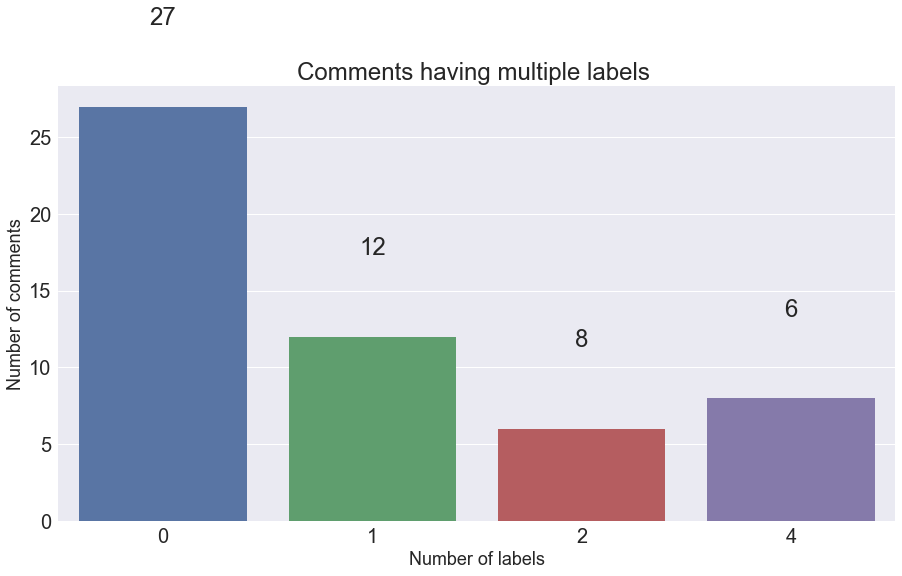

In [23]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

In [25]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## 2. Data Pre-Processing

In [26]:
data = data_raw
#data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(7249, 3)

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [28]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [29]:
data['name'] = data['name'].str.lower()
data['name'] = data['name'].apply(cleanHtml)
data['name'] = data['name'].apply(cleanPunc)
data['name'] = data['name'].apply(keepAlpha)
data.head()

,name,categories_encoded,primaryCategories_encoded
0,sanus vlf b inch super slim full motion moun...,47,3
1,boytone w ch home theater system black...,704,3
2,boytone w ch home theater system black...,704,3
3,boytone w ch home theater system black...,704,3
4,boytone w ch home theater system black...,704,3


### 2.2. Removing Stop Words

In [30]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['name'] = data['name'].apply(removeStopWords)
data.head()

,name,categories_encoded,primaryCategories_encoded
0,sanus vlf b inch super slim full motion moun...,47,3
1,boytone w ch home theater system black...,704,3
2,boytone w ch home theater system black...,704,3
3,boytone w ch home theater system black...,704,3
4,boytone w ch home theater system black...,704,3


### 2.3. Stemming

In [31]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['name'] = data['name'].apply(stemming)
data.head()

,name,categories_encoded,primaryCategories_encoded
0,sanus vlf b inch super slim full motion mount ...,47,3
1,boyton w ch home theater system black diamond,704,3
2,boyton w ch home theater system black diamond,704,3
3,boyton w ch home theater system black diamond,704,3
4,boyton w ch home theater system black diamond,704,3


### 2.4. Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(5074, 3)
(2175, 3)


In [33]:
train_text = train['name']
test_text = test['name']

In [34]:
test_text

2952    detail logitech ue roll wireless portabl bluet...
1634    atrend bbox e dsv b box seri dual vent enclosu...
2622               silicondust hdhomerun hd televis tuner
7047       sonic alert sb ss sonic boom alarm clock white
6731      detail alpin w type coaxial way car speaker spe
3460    refurbish samsung curv k p smart qled tv model...
2829    yamaha w ch network readi k ultra hd pass v ho...
3806    peerless smartmount tilt tv wall mount flat pa...
3870    razer naga chroma mmo game mous programm thumb...
3349                      rug book keyboard case ipad air
6845                benq cinehom ht p dlp projector white
3620    samsung evo gb inch sata iii intern ssd mz e b am
6089    pioneer ch k ultra hd hdr compat v home theate...
3803    peerless smartmount tilt tv wall mount flat pa...
472     power acoustik gothic seri dual voic coil ohm ...
4515                olympus tg waterproof camera inch lcd
509                    tb portabl solid state drive black
2210          

### 2.5. TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['name'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['name'], axis=1)

<5074x7757 sparse matrix of type '<class 'numpy.float64'>'
	with 102791 stored elements in Compressed Sparse Row format>

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [39]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing categories_encoded comments...**

Test accuracy is 0.8441379310344828




**Processing primaryCategories_encoded comments...**

Test accuracy is 0.9972413793103448


Wall time: 1min 51s


In [46]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier



classifier = BinaryRelevance(GaussianNB())

Wall time: 11 ms


### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [47]:


# train
classifier.fit(x_train, y_train)


BinaryRelevance(classifier=GaussianNB(priors=None),
        require_dense=[True, True])

In [48]:
for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
   # predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

**Processing categories_encoded comments...**

**Processing primaryCategories_encoded comments...**

TypeError: len() of unsized object

In [ ]:

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [93]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier



classifier = BinaryRelevance(GaussianNB())
for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    classifier.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = classifier.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing categories comments...**

AttributeError: 'Series' object has no attribute 'reshape'

In [49]:
#!pip3 install scikit-multilearn

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier

classifier = BinaryRelevance(GaussianNB())

for category in categories:
# train
    classifier.fit(x_train, y_train)

    predictions = classifier.predict(x_test)


### 3.3. Classifier Chains

In [39]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [40]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

TypeError: no supported conversion for types: (dtype('O'),)

### 3.4. Label Powerset

In [28]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [29]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8933333333333333


CPU times: user 550 ms, sys: 209 ms, total: 759 ms
Wall time: 662 ms


### 3.5. Adapted Algorithm

In [30]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [31]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.8816666666666667


CPU times: user 2min 28s, sys: 839 ms, total: 2min 29s
Wall time: 2min 29s
